<div>
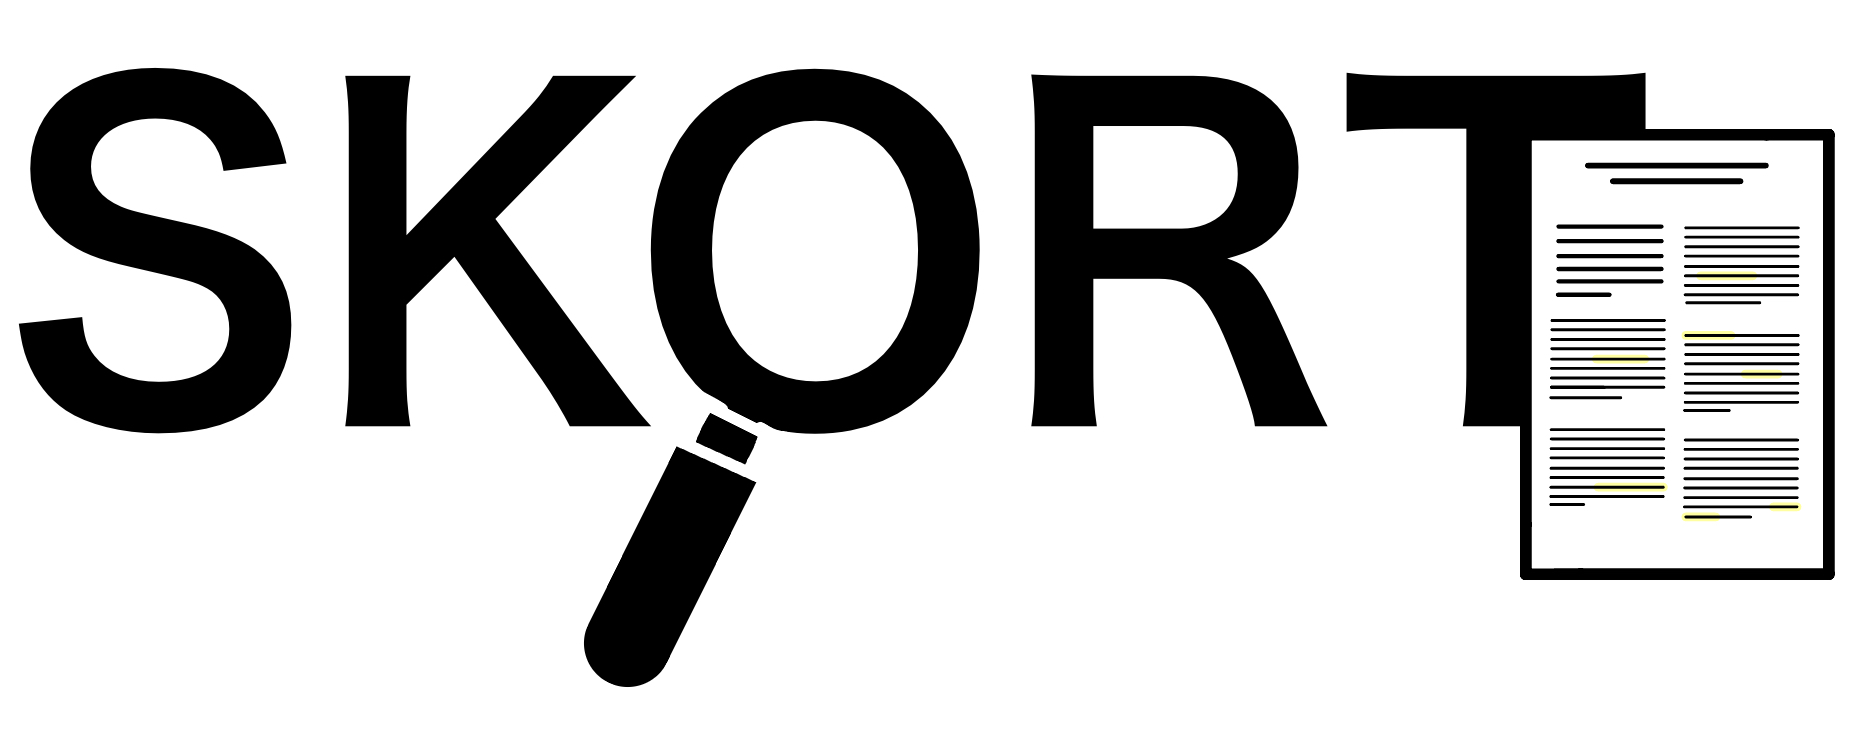
</div>

<div align="center">
    
# Generating Definitions of Extracted AI Terminology Using ChatGPT
    Kristo Wind, Student MSc Applied Artificial Intelligence
</div>

**Disclaimer**: the code shown in this blog is not meant to run. Only for tutorial!

I'm using ChatGPT [1] to extract AI jargon out of a PDF file and generate the corresponding definitions. Those definitions are placed in the text next to the corresponding AI term. For instance, when the sentence 'The two connected neural networks consist of the embedding mentioned in Table I.' comes across, the result should be something similar to the following: 'The two connected neural networks \<a title=' neural network'> An artificial intelligence system modeled after the human brain, consisting of a number of interconnected layers of nodes with the ability to learn by examples.\</a> consist of the embedding \<a title=' embedding'> An embedding is a relatively low-dimensional space into which you can translate high-dimensional vectors.\</a> mentioned in Table I.'

#### Table of Contents
1. Introduction  
    1.1 My Motivation  
    1.2 Why Use the ChatGPT API?  
    1.3 What is ChatGPT?  
2. Read in the Text From PDF
3. Preprocess the Text
4. Generate ChatGPT API Key
5. Extract AI Terms From the Text  
    5.1 So How Are the Results of ChatGPT?  
6. Generate Definitions of Extracted Terms  
    6.1 Are the Results of the Definitions Good?  
7. Put the Definitions in the Text 
8. Is This Ethical?
9. What Are The Limitations of This Approach?
10. Final Thoughts  

## 1. Introduction

### 1.1 My Motivation
Academic papers within the field of artificial intelligence (AI) use relatively difficult technical terms to describe what they are doing. For readers from the same field of research, the technical terms are relatively easy to understand. My goal is to infiltrate the option to let a tool create simple definitions of the AI jargon that can help readers of other domains understand the basic concepts of Artificial Intelligence. I chose AI jargon specifically because I know what words are AI jargon and what words are not. This is because I am a Master's student in Applied Artificial Intelligence. Evaluating the results are a lot easier for me when AI jargon definitions are created because I know what the correct definition of every term is.

This article is published to reach you as an NLP beginner and shows you how ChatGPT can be used as an API in your code to fix your problems! 

### 1.2 Why Use the ChatGPT API?
There are several providers of NLP APIs, such as IBM Watson [2], Google Cloud Natural Language [3], and Microsoft Azure Text Analytics [4]. These APIs provide functions for processing human language, such as word frequency analysis, sentiment analysis, or sentence segmentation. This article uses the brand new ChatGPT API to generate definitions of terms, given the hype that is currently surrounding the chatbot. My fellow students and collegues from my field thought it was a good idea and interesting topic. THey were curious what results this blog would show us about the new tech-hype.

### 1.3 What is ChatGPT?

ChatGPT is a large language model trained by OpenAI [5]. OpenAI is an American AI research laboratory. The training data for ChatGPT includes text from a wide range of sources, including news articles, websites, and books, and covers a wide range of topics. The training data consists of billions of words extracted from the internet, until the end of 2021.

## 2. Read in the Text From PDF

In order to use the text, we first need to read it from the PDF file. 

As mentioned, the text should first be extracted from the PDF file. I do that using the [`PyPDF2`-library](https://pypi.org/project/PyPDF2/). So first I have to install the `PyPDF2` dependency using `pip`:

In [1]:
!pip install PyPDF2

In this example, I will extract the text of the `"AVAA Article K Wind.pdf"` file, but you can import any paper you have stored on your local drive (as long as it has a maximum length of 10 pages, references excluded). All pages are extracted individually. To combine all the extracted pages, I iterated over all the pages of the PDF file and added the text of all the pages to a variable named `text`. The last step is to use `text` as input for the `visitor_body`-function. The `visitor_body`-function only includes the text from the PDF that can be considered informational text. So headers and footers are being excluded. 

In [2]:
from PyPDF2 import PdfReader

parts = []

def visitor_body(text, cm, tm, fontDict, fontSize):
    y = tm[5]
    if y > 50 and y < 720:
        parts.append(text)
        
# Open the PDF-file
with open("AVAA Article K Wind.pdf", "rb") as f:
    # Read the PDF-file with PdfReader
    reader = PdfReader(f)
    # Initialize a variable to store the text
    text = ""
    # Iterate over all pages of the PDF-file
    for page in reader.pages:
        # Add the text of the current page to the variable
        text += page.extract_text(visitor_text=visitor_body)

text_body = "".join(parts)

In [3]:
print(text_body)

Approaching the Age Difference Where A V AA-NN
Generally Fails Age-Invariant Face Recognition
Kristo Wind
Faculty Digital Media and Creative Industry
Amsterdam University of Applied Sciences
Amsterdam, The Netherlands
kristo.wind@hva.nl
Abstract —Facial aging is a well-known topic, but after how
many years does the A V AA siamese neural network identify you
as someone else? This research tries to approach the answer to
this question. A literature study is done to get a feeling when
deep neural networks don’t recognize an individual as a result of
aging. After, two experiments on the A V AA-NN were realized. In
both experiments, fifty frames of participants were saved as input
images and six images per participant were used to compare the
faces individually by the system. The first experiment resulted
in an equation that concludes at what age the validation images
of the system need to be updated, according to the results of the
experiment. The second experiment confirmed the effectiven

## 3. Preprocess the text

In order to use the extracted data, it is necessary to shorten the number of words in the data, such that only possible useful words remain. This step is called preprocessing and is important because the ChatGPT API can only process 2048 tokens per task (input and output), where 1,000 tokens are about 750 words according to OpenAI.

Because the ChatGPT API can only work with a maximum of 2048 words (input and output combined). Because of that, we need to preprocess the text in order to give it to ChatGPT as input. After the text is extracted, all references and notes are deleted, since they are not part of the text. Next, all tokens other than alphabetic characters, dots, and commas are deleted. Also, the stopwords are deleted. They only provide more useless tokens. After that, only unique words are stored as text to reduce the number of tokens. This list of unique words is modified to a string of words (in the order of the text) that should include AI-related terms.

As mentioned, the first preprocessing step is to delete the references and/or notes, since citations are useless for this example.

In [4]:
if "REFERENCES" in text_body or "NOTES" in text_body or "References" in text_body:
    txt_split = str(text_body).split("REFERENCES")
    txt_split = txt_split[0].split("NOTES")
    txt_split = txt_split[0].split("References")
    txt = txt_split[0]
    txt = str(txt)

In [5]:
print('The length of the original text is ' + str(len(text_body)) + ' tokens, and the length of the same text without references and notes is ' + str(len(txt)) + ' tokens. I deleted ' + str(len(text_body)-len(txt)) + ' useless tokens from the original text!')

The length of the original text is 22175 tokens, and the length of the same text without references and notes is 17992 tokens. I deleted 4183 useless tokens from the original text!


To preprocess the remaining text, I use the [`nltk` dependency](https://pypi.org/project/nltk/) to remove the stopwords and tokenize the words. So first I have to install `nltk` using `pip`:

In [6]:
!pip install nltk

All possible important words have to be extracted from the `txt`-variable. This is done by deleting all stopwords and tokens such as "[];.,:?!()0123456789". I then store the text as `text_body2`:

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
text_body1 = str(txt).replace('\n', ' ').replace('[','').replace(']','').replace(';','').replace('.','').replace(',','').replace(':','').replace('0','').replace('?','').replace('!','').replace('1','').replace('2','').replace('3','').replace('4','').replace('5','').replace('6','').replace('7','').replace('8','').replace('9','').replace('(','').replace(')','')
 
word_tokens = word_tokenize(text_body1)
# Converts the words in word_tokens to lower case and then checks whether
# They are present in stop_words or not
text_body2 = [w for w in word_tokens if not w.lower() in stop_words]
# With no lower case conversion
text_body2 = []
 
for w in word_tokens:
    if w not in stop_words:
        text_body2.append(w)
        
print(text_body2)

['Approaching', 'Age', 'Difference', 'Where', 'A', 'V', 'AA-NN', 'Generally', 'Fails', 'Age-Invariant', 'Face', 'Recognition', 'Kristo', 'Wind', 'Faculty', 'Digital', 'Media', 'Creative', 'Industry', 'Amsterdam', 'University', 'Applied', 'Sciences', 'Amsterdam', 'The', 'Netherlands', 'kristowind', '@', 'hvanl', 'Abstract', '—Facial', 'aging', 'well-known', 'topic', 'many', 'years', 'A', 'V', 'AA', 'siamese', 'neural', 'network', 'identify', 'someone', 'else', 'This', 'research', 'tries', 'approach', 'answer', 'question', 'A', 'literature', 'study', 'done', 'get', 'feeling', 'deep', 'neural', 'networks', '’', 'recognize', 'individual', 'result', 'aging', 'After', 'two', 'experiments', 'A', 'V', 'AA-NN', 'realized', 'In', 'experiments', 'fifty', 'frames', 'participants', 'saved', 'input', 'images', 'six', 'images', 'per', 'participant', 'used', 'compare', 'faces', 'individually', 'system', 'The', 'first', 'experiment', 'resulted', 'equation', 'concludes', 'age', 'validation', 'images', '

From all the remaining words, surely some words are more common than others. Since we only need one unique word for every word that exists in the `text_body2`-list, all duplicates are deleted. In the rest of this chapter, the remaining words are combined and stored in the `text_body3`-variable as a string.

The dictionary unique_words also gives a value to each word. I need to modify the dictionary to a list of unique words. Therefore I need to remove the corresponding values and add the words to a list:

In [8]:
unique_words = {}

# Iterate over the words
for index, word in enumerate(text_body2):
    # If the word exists in the dictionary, add it with the current index as the value
    if word not in unique_words:
        unique_words[word] = index

# Only show the words in the dictionary
words = []
for word, count in unique_words.items():
    words.append(word)

print(words)

['Approaching', 'Age', 'Difference', 'Where', 'A', 'V', 'AA-NN', 'Generally', 'Fails', 'Age-Invariant', 'Face', 'Recognition', 'Kristo', 'Wind', 'Faculty', 'Digital', 'Media', 'Creative', 'Industry', 'Amsterdam', 'University', 'Applied', 'Sciences', 'The', 'Netherlands', 'kristowind', '@', 'hvanl', 'Abstract', '—Facial', 'aging', 'well-known', 'topic', 'many', 'years', 'AA', 'siamese', 'neural', 'network', 'identify', 'someone', 'else', 'This', 'research', 'tries', 'approach', 'answer', 'question', 'literature', 'study', 'done', 'get', 'feeling', 'deep', 'networks', '’', 'recognize', 'individual', 'result', 'After', 'two', 'experiments', 'realized', 'In', 'fifty', 'frames', 'participants', 'saved', 'input', 'images', 'six', 'per', 'participant', 'used', 'compare', 'faces', 'individually', 'system', 'first', 'experiment', 'resulted', 'equation', 'concludes', 'age', 'validation', 'need', 'updated', 'according', 'results', 'second', 'confirmed', 'effectiveness', 'made', 'Index', 'Terms', 

In the last step, the list of words are combined into a string of text. The string of unique words is named `text_body3`:

In [9]:
# Combine the words and modify the text into a string
text_body3 = str(' '.join(words)).replace('- ','')
text_body3

'Approaching Age Difference Where A V AA-NN Generally Fails Age-Invariant Face Recognition Kristo Wind Faculty Digital Media Creative Industry Amsterdam University Applied Sciences The Netherlands kristowind @ hvanl Abstract —Facial aging well-known topic many years AA siamese neural network identify someone else This research tries approach answer question literature study done get feeling deep networks ’ recognize individual result After two experiments realized In fifty frames participants saved input images six per participant used compare faces individually system first experiment resulted equation concludes age validation need updated according results second confirmed effectiveness made Index Terms —siamese facial ageinvariant face recognition I NTRODUCTION Deep way identity authentication using convolutional CNNs develops rapidly algorithms come daily life Validated Alcohol Access validate customer right buy alcohol Dutch supermarket chain Albert Heijn According CBL customers s

## 4. Generate ChatGPT API Key

Everyone should use their own ChatGPT API key, as they are personal and should not be published. Therefore, you should create your own API key and replace the string `your_api_key` in the following cell code with your own created API key if you want to copy and use the code. To get the API key for the OpenAI API, you need to create an account on the OpenAI website and request an API key.

To create an account, follow these steps:

1. Go to the OpenAI website: https://openai.com/
2. Click on the "Sign up" link in the top right corner of the page.
3. Follow the instructions on the screen to create an account.

Once you have created an account, you can request an API key by following these steps:

1. Log in to your OpenAI account.
2. Click on the "API Key" button in the navigation bar. (https://beta.openai.com/account/api-keys)
3. Click on the "Generate API Key" button. Once you have generated your API key, you can use it!

Click on the "Generate API Key" button. Once you have generated your API key, you can use it!
Unfortunately, using ChatGPT API is not always free. Well, for the first three months, you get $18.00 of free usage! One disadvantage... you have to give up your credit card details in order to use the API. The price per 1K tokens for every model engine can be found [here](https://openai.com/api/pricing/#faq-token-usage). To view how many free trial credits are remaining on your account, you can look [here](https://beta.openai.com/account/usage). To set up a paid account, go to the [Billing overview](https://beta.openai.com/account/billing/overview) and click 'Setup paid account'.

## 5. Extract AI Jargon From the Text

Jargon in AI can be a big issue for researchers and students from other domains. AI has much terminology in different fields of research (computer science, statistics, mathematics, and cognitive sciences) that has to be understood to know what the text is about. 

So the next step is to extract AI terminology from the `text_body3` variable. To realize this, I use the previously mentioned ChatGPT API. The following code sends a prompt to ChatGPT and stores the output in a list as variable `ai_terms`. 

The `openai.Completion.create()` function takes several parameters, including the engine to use (`model_engine`), the `prompt` to generate completions for, the `max_tokens` to generate, and the `n` number of completions to generate. 

In [10]:
import openai
openai.api_key = 'your_api_key'

def extract_ai_terms(text):
    text = str(text).replace('\n', ' ')
    # Use the ChatGPT API to generate a list of AI terms in the text
    model_engine = "text-davinci-003"
    prompt = (f"Can you extract AI jargon from the following text?: {text}") # or extract AI topics

    completions = openai.Completion.create(
        engine=model_engine,
        prompt=prompt,
        max_tokens=1000,
        n=1,
        temperature=0.5,
    )

    message = completions.choices[0].text.lower()
    ai_terms = message.split(",")
    return ai_terms

ai_terms = extract_ai_terms(text = text_body3)
print(ai_terms)

['ize situations increase accuracy value accuracy-ratio measured per-frame basis conclusion result-ratio vp-ratio close compares existing databases vii c onclusion\n\nai jargon: convolutional neural network (cnns)', ' siamese neural network', ' deep networks', ' facial age-invariant face recognition', ' zero-shot', ' one-shot', ' few-shot learning', ' siamese neural network', ' embedding', ' feature mappings', ' distance layer', ' similarity metric', ' highest-level representation', ' binary prediction', ' detection threshold', ' verification ratio.']


In [11]:
# Delete everything from output untill 'ai jargon: ', since the first element of the list includes parts of a sentence
if 'ai jargon: ' in ai_terms[0]:
    ai_terms1 = ai_terms[0].split("ai jargon: ")[1]
ai_terms[0]=ai_terms1
print(ai_terms)

['convolutional neural network (cnns)', ' siamese neural network', ' deep networks', ' facial age-invariant face recognition', ' zero-shot', ' one-shot', ' few-shot learning', ' siamese neural network', ' embedding', ' feature mappings', ' distance layer', ' similarity metric', ' highest-level representation', ' binary prediction', ' detection threshold', ' verification ratio.']


<div>
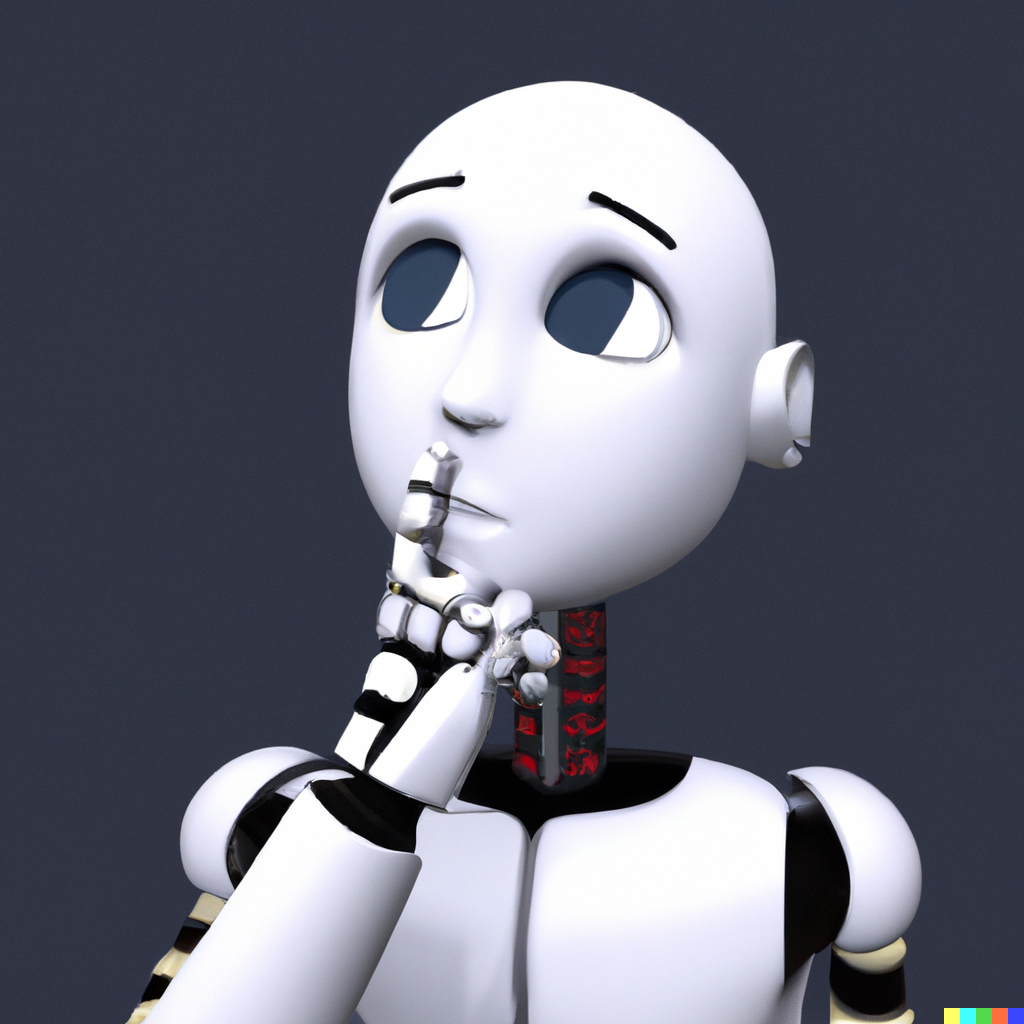
</div>

### 5.1 So How Are the Results of ChatGPT?
When I look at the `ai_terms`-list, I think I can conclude that the ChatGPT API works quite well. Some so-called terms are not perfectly extracted, but it is doable. For instance, the first 'term' looks more like a weird sentence. That is also not extracted perfectly. Besides those 'terms', the list features real AI-related terms. Now let's move on to generating definitions of the terms and hope that ChatGPT can also make something out of the less good extracted terms!

## 6. Generate the Definitions of the Extracted Terms

The next step is to ask ChatGPT the definition of every term in the `ai_terms`-list and store them in a dictionary called `definitions`. I do that using the same API key as in the previous lines of code. So when trying this code yourself, again replace `'your_api_key'` with your own generated key! 

In [12]:
import openai

# Connect to ChatGPT API
openai.api_key = "your_api_key"

# Define a function to ask the definition of every term in a list
def get_definition(term):
    prompt = f"What are the definitions of the following list of AI terms?: {term}"
    response = openai.Completion.create(engine="text-davinci-003", prompt=prompt, max_tokens=1500)
    return response.choices[0].text.replace('\n','')

# Store the definitions of the terms in a dictionary
definitions = {}
for term in ai_terms:
    definitions[term] = get_definition(term)

In [13]:
print(definitions)

{'convolutional neural network (cnns)': 'Convolutional neural networks (CNNs) are a type of artificial neural network that is composed of multiple layers of convolutional units. CNNs are designed to recognize patterns in raw input data, such as images and video. Each layer in the CNN is responsible for extracting a different feature or concept, resulting in a “hierarchy” of abstracted data. This hierarchy is then used to make predictions and classify data into certain categories. CNNs are primarily used in computer vision tasks such as object detection, image segmentation, and facial recognition.', ' siamese neural network': 'A Siamese Neural Network is a type of artificial neural network architecture often used for comparing the similarity of two inputs. It is a type of neural network architecture which uses the same weights while processing the inputs through separate branches. The outputs of the branches are compared to determine the similarity or distance between the inputs. This t

<div>
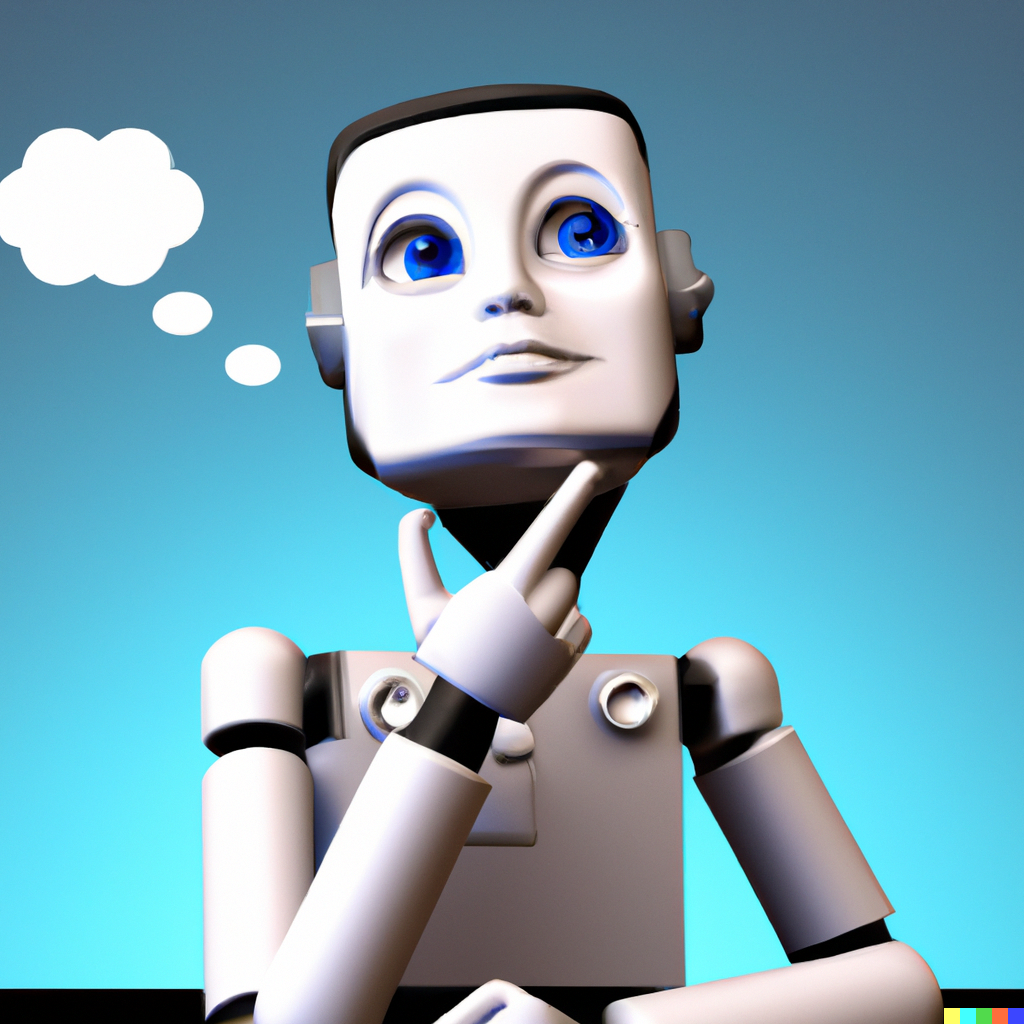
</div>

### 6.1 Are the Results of the Definitions Good?
The definitions of the extracted AI-related terms seem of good quality. Even though some terms may not be perfectly written down, ChatGPT knows what the terms mean and produces a good-quality definition. So that is working really well!

## 7. Put the Definitions in the Text 

The last step is to implement the definitions of the AI-related terms into the text of the PDF document. After many attempts to visualize tooltips with the definitions in a PDF viewer, the definitions of the terms are placed next to the corresponding terms in the text. This is done using a [regular expression](https://pypi.org/project/regex/) (`regex` or `re`) operation.

The definitions of the terms that are present in the `definitions`-dictionary are placed next to the term itself.

In [14]:
import re

# Replace each term with a string that includes the definition in a tooltip
for term, definition in definitions.items():
    text = re.sub(term, f"<a title='{term}'>{definition}</a>", txt.lower())

print(text)

approaching the age difference where a v aa-nn
generally fails age-invariant face recognition
kristo wind
faculty digital media and creative industry
amsterdam university of applied sciences
amsterdam, the netherlands
kristo.wind@hva.nl
abstract —facial aging is a well-known topic, but after how
many years does the a v aa siamese neural network identify you
as someone else? this research tries to approach the answer to
this question. a literature study is done to get a feeling when
deep neural networks don’t recognize an individual as a result of
aging. after, two experiments on the a v aa-nn were realized. in
both experiments, fifty frames of participants were saved as input
images and six images per participant were used to compare the
faces individually by the system. the first experiment resulted
in an equation that concludes at what age the validation images
of the system need to be updated, according to the results of the
experiment. the second experiment confirmed the effectiven

In [15]:
print('The text is ' + str(len(text)-len(txt)) + ' tokens longer than originally, because of the definitions that are placed in the text.')

The text is 762 tokens longer than originally, because of the definitions that are placed in the text.


## 8. Is This Ethical?
First, I have to mention that when the results of the ChatGPT API are good, the potential advantages are impressive! People that use this tool retain new information more easily, the communication between experts and non-experts is improving, and the tool could make it easier for people to understand and engage with texts that use specialized language. The tool can also have a negative impact since it is generated text. This problem arises when the generated text reveals forms of discrimination or generates citations or hyperlinks that don't exist. ChatGPT is mostly resistant to discrimination, but when the prompt given to ChatGPT is inappropriate, the system can spit out discriminating sentences. OpenAI is working on creating filters to remove harmful prompts and outputs. Regarding citations and hyperlinks that don't exist, ChatGPT only knows what a citation or hyperlink should generally look like, so it creates its own sometimes. All these things conclude that the outcome of the text is not verified to be correct. Thus, the users of the tool may consider a definition as true when the definition of the term is incorrect in essence. This may potentially lead to inaccuracies or misunderstandings. Since the tools users are no experts in the AI field, and the API generates other outcomes every time it is used, this can be seen as unethical.

## 9. What Are The Limitations of This Approach?
* **Accuracy**   
ChatGPT's ability to accurately extract jargon and generate definitions may potentially lead to inaccuracies or misunderstandings since not everything it spits out is accurate. I personally think that extracting the jargon is less accurate than the generated definitions of the extracted jargon because sometimes the tool extracts words that are not jargon. As far as I have seen, the results of the definitions are really accurate.


* **Token capacity**  
Articles are usually much longer than 2048 words. So the maximum of 2048 words per ChatGPT API process is definitely a limitation! This issue leads to the requirement that any discussed paper should be no longer than 10 pages of text, the references excluded. Or, the paper can be split and processed in chunks of text. Using this technique, there is no maximum length of the paper.


* **Train data**  
Since ChatGPT is trained on text from September 2021 and earlier, relatively new AI terminology is not known by the huge language model.  


* **Accessibility**   
At this moment, using ChatGPT is free. But it's just a matter of time until that changes. From that moment on there are costs involved. Is it still worth it then?


* **GPT-4**  
OpenAI, the creator of ChatGPT, is working on a much bigger language model: GPT-4. ChatGPT is based on the GPT-3 language model. The fact that a new chatbot that is based on GPT-4 is being deployed, can lead to issues such as no support for ChatGPT, or even the removal of ChatGPT! That makes this blog outdated.

More limitations regarding ChatGPT can be found on [OpenAI's own blog about ChatGPT](https://openai.com/blog/chatgpt/).

## 10. Final Thoughts
Throughout this article, I tried to show that with a little knowledge in Python and NLP, it is possible to create a simple tool that can place generated definitions by the corresponding terms in a text.

Besides this example, you can do plenty more with NLP and ChatGPT. You can create any content you like, including coding and debugging! It's amazing how well ChatGPT can explain everything.

Thanks for reading all the way to the end of the article! Feel free to reach out to my [LinkedIn](https://www.linkedin.com/in/kristo-wind/) if you have any questions or remarks!


## References
[1] OpenAI, 2022, 'ChatGPT: Optimizing Language Models for Dialogue' (https://openai.com/blog/chatgpt/)  
[2] IBM Watson, z.d., 'Incorporate conversation, language, and advanced text analytics into your apps' (https://developer.ibm.com/components/watson-apis/)  
[3] Google Cloud, z.d., 'Natural Language AI', (https://cloud.google.com/natural-language)  
[4] Microsoft Azure, z.d., 'Text analytics', (https://azure.microsoft.com/en-us/products/cognitive-services/text-analytics)  
[5] OpenAI, z.d., (https://openai.com/)